# Assignment 5 - Evaluating environmental impact of your exam portfolio

In this notebook, we will evaluate the environmental impact of the code used in previous assignments. We will use CodeCarbon to measure the CO₂ emissions of the scripts and analyse the results to address the following questions:

- Which assignment generated the most emissions in terms of CO₂eq? Explain why this might be.
- Which specific tasks generated the most emissions in terms of CO₂eq? Again, explain why this might be.
- How robust do you think these results are and how/where might they be improved?

## Libaries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Emissions Data
Next, we will load the emissions CSV files generated by CodeCarbon for each of the previous assignments. The CSV files are stored in the `in` folder together with an example of the CodeCarbon script we used to calculate the emissions.

During the emission tracking for the assignments, I forgot to add a column that specifies which assignment it belongs to and some of the assignments contain multiple scripts. Therefore, we are going to extract the assignment number from the file name and add it as a column 

In [2]:
# Function for extracting the assignment number from the file name- Plain and simple but it does the job
def extract_number(filename):
    if "1" in filename:
        return "Assignment 1"
    elif "2" in filename:
        return "Assignment 2"
    elif "3" in filename:
        return "Assignment 3"
    elif "4" in filename:
        return "Assignment 4"

# Function that loads the data, extracts the number from the file name and adds a column with the assignment number for each of the scripts in the files
def load_data(files):
    data = []
    for file in files:
        number = extract_number(file)
        df = pd.read_csv(file)
        df["Assignment"] = number
        data.append(df)
    return pd.concat(data, ignore_index=True)

# list of the files
emission_files = [
    "../in/emissions_assignment1.csv",
    "../in/emissions_assignment2.csv",
    "../in/emissions_assignment3.csv",
    "../in/emissions_assignment4.csv"
]

# loads and annotates the data with the correct assignment number
df = load_data(emission_files)

# sanity check
print(df.head())

                   Script  Emissions (kg CO2)    Assignment
0         nlp_analysis.py            0.002185  Assignment 1
1       vectorize_data.py            0.000153  Assignment 2
2  logistic_regression.py            0.000002  Assignment 2
3       neural_network.py            0.000294  Assignment 2
4            lyrics_query            0.000033  Assignment 3


## Analysing the Data
We will analyze the data to find out which assignment and which specific script generated the most emissions. We will group the data by assignment and by script and then calculate the total emissions for each group.

In [3]:
# Calculate the emissions caused by the assignments as a whole
emissions_assignment = df.groupby("Assignment")[["Emissions (kg CO2)"]].sum()

# Calculate the emissions caused by the individual scripts
emissions_script = df.groupby("Script")[["Emissions (kg CO2)"]].sum()

# Calculate the total emissions caused by all of the scripts combined
total_emissions_all_scripts = df["Emissions (kg CO2)"].sum()

# Going to convert it to grams to put some perspective on the emissions
emissions_assignment["Emissions (g CO2(eq))"] = emissions_assignment["Emissions (kg CO2)"] * 1000
emissions_script["Emissions (g CO2(eq))"] = emissions_script["Emissions (kg CO2)"] * 1000
total_emissions_all_scripts_grams = total_emissions_all_scripts * 1000

# remove the kg column (so it doesnt mess up the plot)
emissions_assignment = emissions_assignment.drop(columns=["Emissions (kg CO2)"])
emissions_script = emissions_script.drop(columns=["Emissions (kg CO2)"])

# Print the emissions by assignments
print("Emissions by assignment:")
for assignment, emission in emissions_assignment.iterrows():
    print(f"{assignment}: {emission["Emissions (g CO2(eq))"]:.2f} g CO2(eq)")

# Print the emissions by scripts
print("\nEmissions by script:")
for script, emission in emissions_script.iterrows():
    print(f"{script}: {emission["Emissions (g CO2(eq))"]:.2f} g CO2(eq)")

# Print the total emissions for all scripts combined
print(f"\nTotal emissions for all scripts combined: {total_emissions_all_scripts_grams:.2f} g CO2(eq)")

Emissions by assignment:
Assignment 1: 2.18 g CO2(eq)
Assignment 2: 0.45 g CO2(eq)
Assignment 3: 0.03 g CO2(eq)
Assignment 4: 26.56 g CO2(eq)

Emissions by script:
logistic_regression.py: 0.00 g CO2(eq)
lyrics_query: 0.03 g CO2(eq)
neural_network.py: 0.29 g CO2(eq)
nlp_analysis.py: 2.18 g CO2(eq)
plot_data.py: 0.01 g CO2(eq)
process_data.py: 26.54 g CO2(eq)
top_character.py: 0.00 g CO2(eq)
vectorize_data.py: 0.15 g CO2(eq)

Total emissions for all scripts combined: 29.23 g CO2(eq)


## Visualising the Data
Plots to show the total emissions by assignment and by script:

<Figure size 1000x600 with 0 Axes>

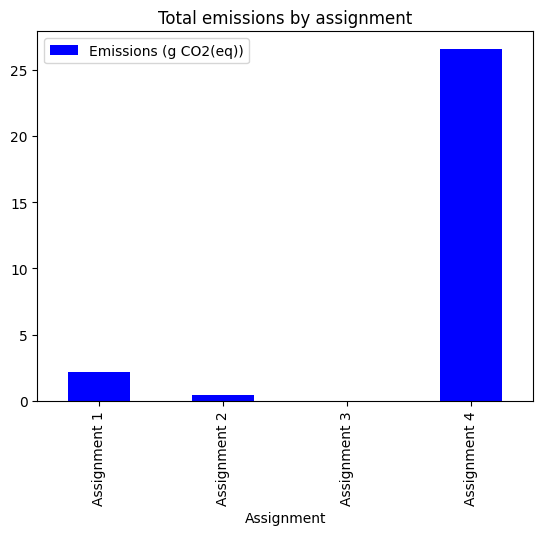

<Figure size 1200x800 with 0 Axes>

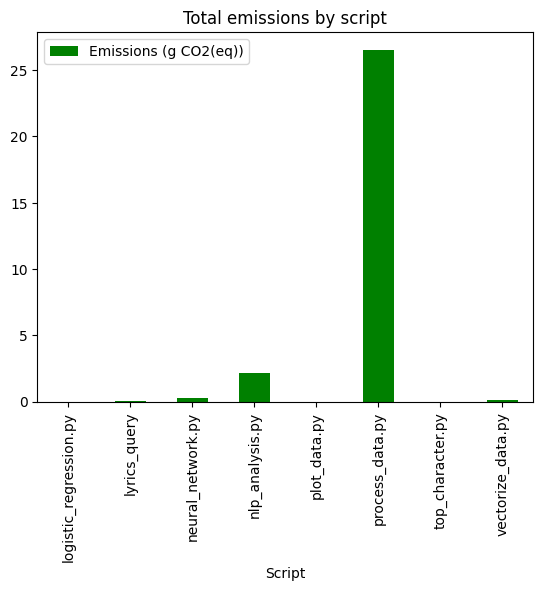

In [4]:
# Total emissions by assignment
plt.figure(figsize=(10, 6))
emissions_assignment.plot(kind="bar", color="blue")
plt.title("Total emissions by assignment")
plt.xlabel("Assignment")
plt.show()

# Total emissions by script
plt.figure(figsize=(12, 8))
emissions_script.plot(kind="bar", color="green")
plt.title("Total emissions by script")
plt.xlabel("Script")
plt.show()

## Interpretation of results
Based on the above analysis, we can say the following:

- **Assignment with the most emissions**:
   - Assignment 4 generated the most emissions, which was pretty much only from the `process_data.py` script which also had the highest CO₂ emissions among all of the scripts. This script handled the emotion classification of the GoT data set.

### Reasons for the high emissions caused by process_data script
- **Large Dataset**: The dataset contains many lines of dialogue, each of which needs to be processed. I even split up the processing into batches of 10 to optimise the processing but it still had to go through around 2.5k batches- meaning that the data set contains around 25k lines of dialog that the model has to process.

- **Emotion Classification**: The emotional classification uses a transformers pipeline, which is based on deep learning. These models takes a lot of computational resources to process each sentence. Furthermore, the classification had to identify multiple different emotions and as I wanted to see which character showed the most of an emotion during each season, the classification had to append the emotional scores for each line to the original data set, which upped the computational load also.


## Implications
The total emissions caused by running all of the portfolios is 29.23g of CO2 equavilent. This is equal to brewing 3/4 of a cup of coffee (https://www.co2everything.com/co2e-of/coffee). While this might seem low, it is important to remember that the emissions were only tracked for the final run of the portfolios and not all of the testing and faulty runs that my scripts had. Also, it is important to note that purely computionally then the language portfolio is far less heavy than the visual was, which we did not track the emissions of.



## Reliability of the CarbonCode tracking
While I believe the tool can act as a good baseline for estimating the emissions caused by the code, it would be impossible to precisely track the CO2 emission caused by running code. If they truly were to capture the CO_2 emissions of the code, they would need to have access to real-time updates on how much of the energy on the power grid is renewable at that time for the specific country (and even region) where the setup is located. That would be a major undertaking, so I'd assume they use a flat baseline for each country (or region) so that CO2 emissions are calculated based on an average day. Another aspect is that the tool only seems to capture how much power the hardware is using and calculating the emissions solely based on that. However, it might not incorporate the hardware production cost (in terms of cost of CO2). For instance, the UCloud system that we have been using for the portfolios uses a hardware setup that was purely setup for doing tasks like we have been doing. Therefore, it serves no second purpose, and the CO2 emissions of producing and setting up the system should also be included in the calculation. This would also be an impossible undertaking (what is the expected lifetime of the system, what are the benefits of using it, is it used for different purposes and how do we calculate a CO2 cap for that). 

While the tool might not be precise down to the wire, the tool can still act as a baseline and more importantly as a powerful awareness tool of just how much power the increasingly growing AI-industry needs to function.
